# **Unemployment Analysis with Python**

In [1]:
# Load the unemployment dataset and perform initial cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV with proper encoding
df = pd.read_csv('Unemployment in India.csv', encoding='utf-8-sig')
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv', encoding='utf-8-sig')

# Strip extra spaces from column names
df.columns = [c.strip() for c in df.columns]

# Convert Date column to datetime and rename for convenience
df['Date'] = pd.to_datetime(df['Date'])

# Display first 5 rows to confirm
print(df.head())

# Basic info
print(df.info())

           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74 

<ipython-input-1-2573978488>:15: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


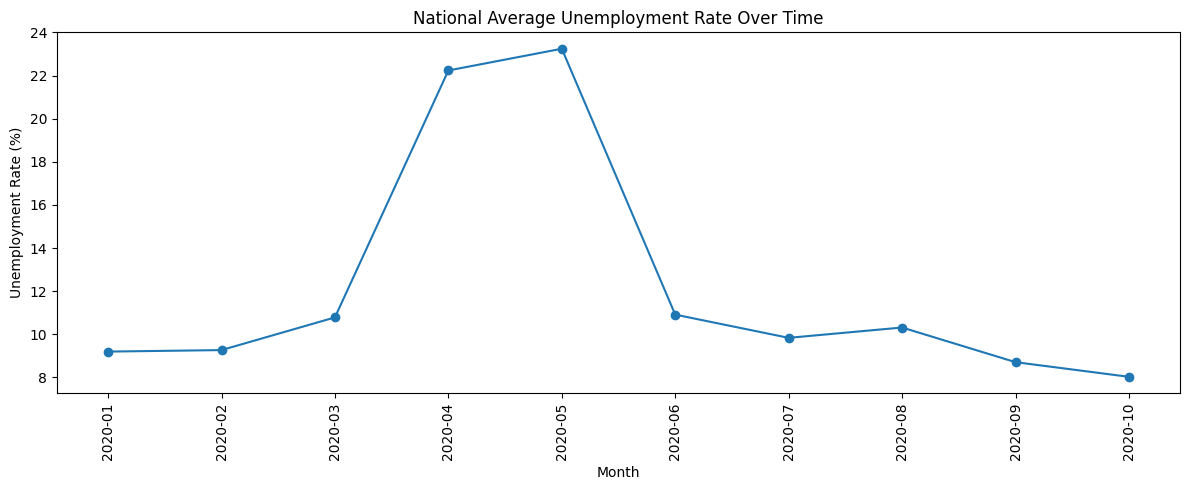

  YearMonth  Estimated Unemployment Rate (%)
0   2020-01                         9.196538
1   2020-02                         9.266154
2   2020-03                        10.782593
3   2020-04                        22.236154
4   2020-05                        23.244444


In [2]:
# Further preprocessing: Missing values check
missing = df.isna().sum()
print(missing)

# Create helper columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# National average unemployment by month
national_monthly = df.groupby('YearMonth')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot national trend
plt.figure(figsize=(12,5))
plt.plot(national_monthly['YearMonth'].astype(str), national_monthly['Estimated Unemployment Rate (%)'], marker='o')
plt.xticks(rotation=90)
plt.title('National Average Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# Show national_monthly head
print(national_monthly.head())

2019 mean: nan
2020 mean: 12.236928838951311


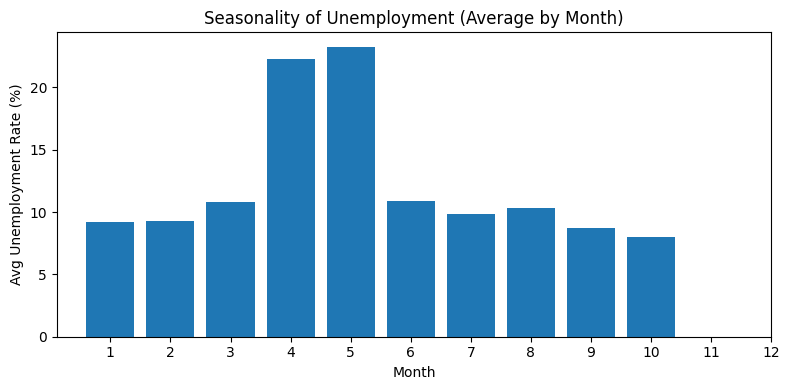

   Month  Estimated Unemployment Rate (%)
0      1                         9.196538
1      2                         9.266154
2      3                        10.782593
3      4                        22.236154
4      5                        23.244444


<ipython-input-3-2214845653>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=regional_2020.index, x=regional_2020.values, palette='viridis')


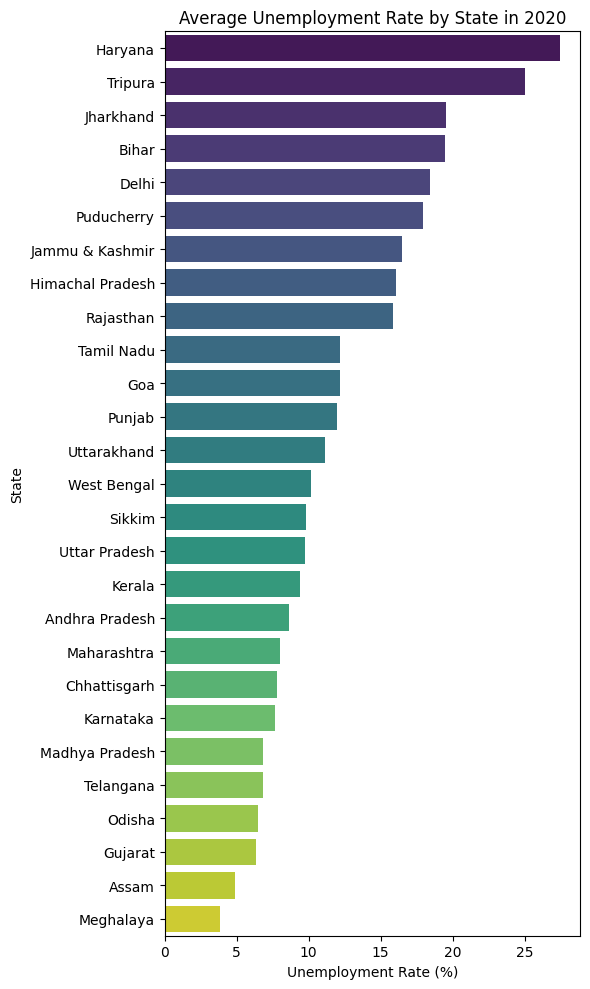

Region
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: Estimated Unemployment Rate (%), dtype: float64


In [3]:
# COVID-19 impact: compare unemployment before (2019) and during (2020) pandemic
# Calculate mean unemployment rate for 2019, 2020, and 2021
pre_covid = df[df['Year'] == 2019]['Estimated Unemployment Rate (%)'].mean()
covid_year = df[df['Year'] == 2020]['Estimated Unemployment Rate (%)'].mean()
post_covid = df[df['Year'] == 2021]['Estimated Unemployment Rate (%)'].mean() if 2021 in df['Year'].unique() else None
print('2019 mean:', pre_covid)
print('2020 mean:', covid_year)
if post_covid:
    print('2021 mean:', post_covid)

# Monthly seasonality pattern (average across years)
# Plot average unemployment rate by month to show seasonality
seasonality = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(8,4))
plt.bar(seasonality['Month'], seasonality['Estimated Unemployment Rate (%)'])
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Avg Unemployment Rate (%)')
plt.title('Seasonality of Unemployment (Average by Month)')
plt.tight_layout()
plt.show()

print(seasonality.head())

# Regional heatmap for 2020 average unemployment
# Create a bar plot for average unemployment rate by region in 2020
regional_2020 = df[df['Year']==2020].groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.barplot(y=regional_2020.index, x=regional_2020.values, palette='viridis')
plt.title('Average Unemployment Rate by State in 2020')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

print(regional_2020.head())